In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## Root mean squared error

standard deviation of the residuals (i.e. how spread the residuals are)

In [47]:
np.sqrt(np.mean((e)**2))

0.5526043378591846

## Mean absolute error

In [48]:
np.mean(np.abs(e))

0.4490916582949643

## Interest rate
Pricing formula from Options, Futures, and Other Derivatives by John C. Hull "Estimating default probabilities from bond yield spreads" Chapter 24.4

Analysis using actual default rates

In [6]:
df1 = pd.read_csv(r"C:\Users\matte\Documents\Bocconi\Finance_with_big_data\group_project\data\ActualValuesEval.csv")
df2 = pd.read_csv(r"C:\Users\matte\Documents\Bocconi\Finance_with_big_data\group_project\data\ActualValuesTrain.csv")

In [7]:
df1.drop(df1.columns[0], inplace = True, axis = 1)
df_actual = pd.concat([df1, df2], axis = 0)
df_actual.rename({'CDR3':'default_rate_cum'}, inplace = True, axis = 1)

In [10]:
recovery_rate = 0.1 # assumption
mid_swap_US = 0.0048 # as of 07 December 2020

def annualized_avg_default_rate(default_rate):
    return - np.log(1 - default_rate) / 3

In [8]:
def get_interest_rate(default_rate):
    mid_swap_US = 0.0048
    recovery_rate = 0.1
    annualized_avg_default_rate = - np.log(1 - default_rate) / 3
    return ((1 - recovery_rate) * annualized_avg_default_rate + mid_swap_US) * 100    
    

In [27]:
get_interest_rate(0.07)

2.657120785045065

In [11]:
df_actual['default_rate_ann'] = annualized_avg_default_rate(df_actual['default_rate_cum'])

In [12]:
df_actual['interest_rate_ann'] = ((1 - recovery_rate) * df_actual['default_rate_ann'] + mid_swap_US) * 100

In [13]:
df_actual['interest_rate_cum'] = ((1 - recovery_rate) * df_actual['default_rate_cum'] + mid_swap_US) * 100

In [25]:
df_actual.head()

,default_rate_cum,default_rate_ann,interest_rate_ann,interest_rate_cum
0,0.126,0.044892,4.520247,11.82
1,0.162,0.058912,5.782115,15.06
2,0.008,0.002677,0.720965,1.20
3,0.178,0.065338,6.360447,16.50
4,0.138,0.049500,4.935000,12.90


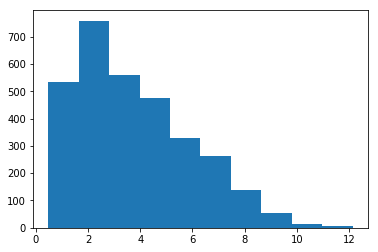

In [14]:
plt.hist(df_actual['interest_rate_ann'])
plt.show()

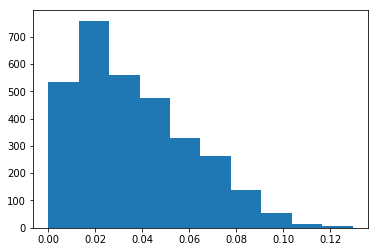

In [15]:
plt.hist(df_actual['default_rate_ann'])
plt.show()

## Analysis credit ratings

uniform is probably the most appropriate

In [21]:
# by density

df_actual_sorted = df_actual.sort_values(by = 'default_rate_ann', axis = 0, ascending = True)

number_of_ratings = 10
rating_index_threshold = len(df_actual_sorted)//number_of_ratings

for threshold in range(1, number_of_ratings):
    print(df_actual_sorted.iloc[[rating_index_threshold * threshold]][['default_rate_ann']])

     default_rate_ann
775          0.009124
      default_rate_ann
2357          0.014651
     default_rate_ann
176          0.019563
     default_rate_ann
181          0.025267
     default_rate_ann
146          0.031437
      default_rate_ann
2574          0.039595
     default_rate_ann
935          0.048342
      default_rate_ann
1025          0.056534
     default_rate_ann
426          0.071891


In [62]:
df_actual_sorted = df_actual.sort_values(by = 'default_rate_ann', axis = 0, ascending = True)

lower_bound_default_rate = df_actual_sorted.iloc[0]
upper_bound_default_rate = df_actual_sorted.iloc[-1]

incremental_step = (upper_bound_default_rate - lower_bound_default_rate) / number_of_ratings

credit_rating_thresholds = []

for step in range(1, 10):
    credit_rating_thresholds.append(incremental_step[0] * step)
    
    
def get_credit_rating(default_rate):
    if default_rate <= credit_rating_thresholds[0]:
        return "CR1"
    elif default_rate <= credit_rating_thresholds[1]:
        return "CR2"
    elif default_rate <= credit_rating_thresholds[2]:
        return "CR3"
    elif default_rate <= credit_rating_thresholds[3]:
        return "CR4"
    elif default_rate <= credit_rating_thresholds[4]:
        return "CR5"
    elif default_rate <= credit_rating_thresholds[5]:
        return "CR6"
    elif default_rate <= credit_rating_thresholds[6]:
        return "CR7"
    elif default_rate <= credit_rating_thresholds[7]:
        return "CR8"
    elif default_rate <= credit_rating_thresholds[8]:
        return "CR9"
    else:
        return "CR10"


    
    

In [65]:
get_credit_rating(0.30)

'CR10'

In [51]:
credit_rating_thresholds

[0.0322,
 0.0644,
 0.09659999999999999,
 0.1288,
 0.161,
 0.19319999999999998,
 0.2254,
 0.2576,
 0.2898]

In [39]:
# constant step

lower_bound_default_rate = df_actual_sorted.iloc[0]
upper_bound_default_rate = df_actual_sorted.iloc[-1]

incremental_step = (upper_bound_default_rate - lower_bound_default_rate) / number_of_ratings

credit_rating_thresholds = []

for step in range(1,10):
    credit_rating_thresholds.append(lower_bound_default_rate[0] + incremental_step * step)
